In [67]:
# convert data to pandas dataframe
import pandas as pd
import numpy as np

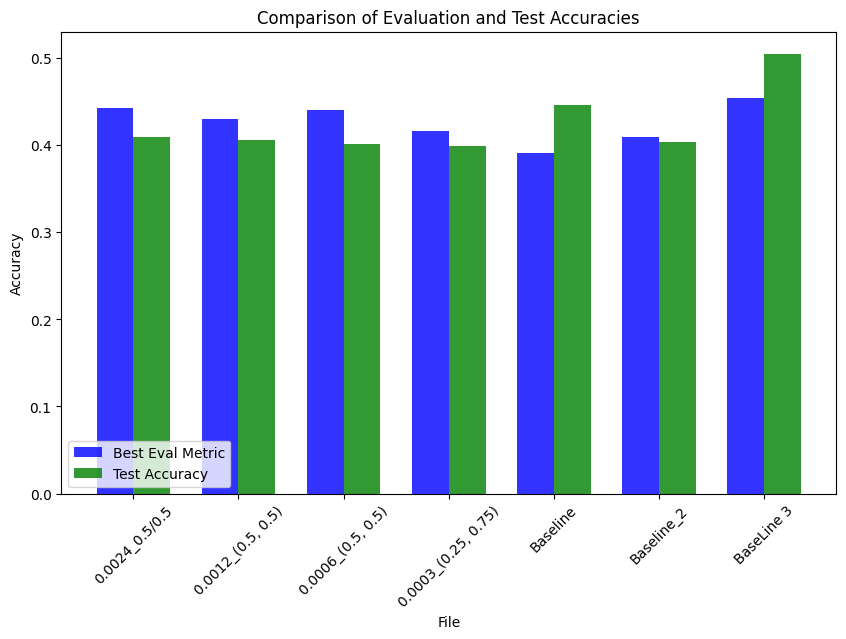

In [77]:
import json
import matplotlib.pyplot as plt

# Paths to your JSON files
file_paths = [
    '/Users/tompieper/t5-small-logs/0.0024_(0.5, 0.5)/metrics.json',
    '/Users/tompieper/t5-small-logs/0.0012_(0.5, 0.5)/metrics.json',
    '/Users/tompieper/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json', 
    # '/Users/tompieper/t5-small-logs/0.0003_(0.75, 0.25)/metrics.json', 
    '/Users/tompieper/t5-small-logs/0.0003_(0.25, 0.75)/metrics.json',
    '/Users/tompieper/t5-small-logs/0.0024/metrics.json',
    '/Users/tompieper/metrics.json',
    '/Users/tompieper/v2.1/logs/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json'
    ]
file_names = [
    '0.0024_0.5/0.5', 
    '0.0012_(0.5, 0.5)', 
    '0.0006_(0.5, 0.5)', 
    # '0.0003_(0.75, 0.25)', 
    '0.0003_(0.25, 0.75)', 
    'Baseline',
    'Baseline_2',
    'BaseLine 3'
    ]
# Initialize lists to hold the metrics
eval_accuracies = []
test_accuracies = []
best_eval_accuracies = []

# Loop through each file, read the data, and extract the metrics
for path in file_paths:
    with open(path, 'r') as file:
        data = json.load(file)
        # Assuming the last entry in log_history contains the final eval/test metrics
        # Check for None and set a default value if necessary
        eval_accuracy = 0  # Default value if not found
        test_accuracy = 0  # Default value if not found
        best_eval_accuracy =  data['best_metric']  # Default value if not found
        for entry in data['log_history']:
            if 'test_label_accuracy' in entry:
                test_accuracy = entry['test_label_accuracy']
            elif 'test_exact_match_accuracy' in entry:
                test_accuracy = entry['test_exact_match_accuracy']
                
            if 'eval_label_accuracy' in entry and entry['eval_label_accuracy'] > eval_accuracy:
                eval_accuracy = entry['eval_label_accuracy']
            elif 'eval_exact_match_accuracy' in entry and entry['eval_exact_match_accuracy'] > eval_accuracy:
                eval_accuracy = entry['eval_exact_match_accuracy']
                
        eval_accuracies.append(eval_accuracy)
        test_accuracies.append(test_accuracy)
        best_eval_accuracies.append(best_eval_accuracy)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(file_paths))
bar_width = 0.35
opacity = 0.8

# rects1 = ax.bar(index, eval_accuracies, bar_width, alpha=opacity, color='b', label='Eval Accuracy')
# rects2 = ax.bar(index, best_eval_accuracies, bar_width, alpha=opacity, color='b', label='Best Eval Metric')
rects2 = ax.bar(index, eval_accuracies, bar_width, alpha=opacity, color='b', label='Best Eval Metric')
rects3 = ax.bar([p + bar_width for p in index], test_accuracies, bar_width, alpha=opacity, color='g', label='Test Accuracy')

ax.set_xlabel('File')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Evaluation and Test Accuracies')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(file_names)
ax.tick_params(axis='x', labelrotation=45)

ax.legend(loc='lower left')

# plt.tight_layout()

plt.show()



In [78]:
first_df = pd.DataFrame({'File': file_names, 'Eval Accuracy': eval_accuracies, 'Test Accuracy': test_accuracies, 'Best Eval Metric': best_eval_accuracies})
print(first_df)

                  File  Eval Accuracy  Test Accuracy  Best Eval Metric
0       0.0024_0.5/0.5          0.442          0.409          0.442000
1    0.0012_(0.5, 0.5)          0.430          0.406          0.430000
2    0.0006_(0.5, 0.5)          0.440          0.401          0.440000
3  0.0003_(0.25, 0.75)          0.416          0.399          0.416000
4             Baseline          0.391          0.446          0.391000
5           Baseline_2          0.409          0.404          0.409000
6           BaseLine 3          0.454          0.505          0.176841


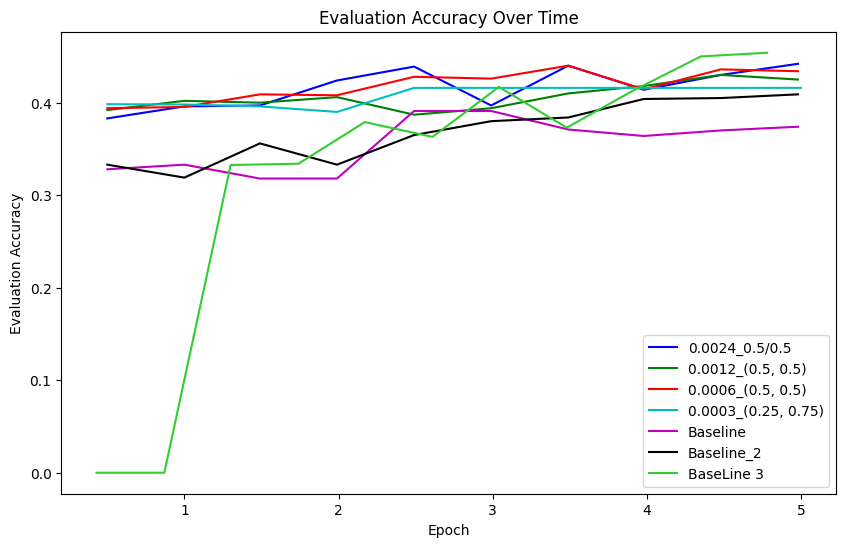

In [80]:
colors = ['b', 'g', 'r', 'c', 'm', 'k', 'limegreen']  # Different colors for each file

plt.figure(figsize=(10, 6))  # Set the figure size

# Loop through each file, read the data, extract the metrics, and plot
for i, path in enumerate(file_paths):
    with open(path, 'r') as file:
        data = json.load(file)
        
        # Initialize lists to hold epochs and eval_accuracies
        epochs = []
        eval_accuracies = []
        
        # Extract epochs and eval_label_accuracy
        for entry in data['log_history']:
            if 'epoch' in entry and 'eval_label_accuracy' in entry:
                epochs.append(entry['epoch'])
                eval_accuracies.append(entry['eval_label_accuracy'])
            elif 'epoch' in entry and 'eval_exact_match_accuracy' in entry:
                epochs.append(entry['epoch'])
                eval_accuracies.append(entry['eval_exact_match_accuracy'])
                
        # Plot if we have the data
        if epochs and eval_accuracies:
            plt.plot(epochs, eval_accuracies, label=file_names[i], color=colors[i])

plt.xlabel('Epoch')
plt.ylabel('Evaluation Accuracy')
plt.title('Evaluation Accuracy Over Time')
plt.legend()
plt.show()

# V2 

In [45]:
file_names_v2 = [
    '/Users/tompieper/v2logs/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0006_(0.75, 0.25)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0012_(0.5, 0.5)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0012_(0.25, 0.75)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0012_(0.75, 0.25)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0024_(0.5, 0.5)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0024_(0.25, 0.75)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0024_(0.75, 0.25)/metrics.json'
]

In [52]:
# for i in file_names_v2:
#     i = i.split('/')[-2]

names = [i.split('/')[-2] for i in file_names_v2]
print(names)

['0.0006_(0.5, 0.5)', '0.0006_(0.25, 0.75)', '0.0006_(0.75, 0.25)', '0.0012_(0.5, 0.5)', '0.0012_(0.25, 0.75)', '0.0012_(0.75, 0.25)', '0.0024_(0.5, 0.5)', '0.0024_(0.25, 0.75)', '0.0024_(0.75, 0.25)']


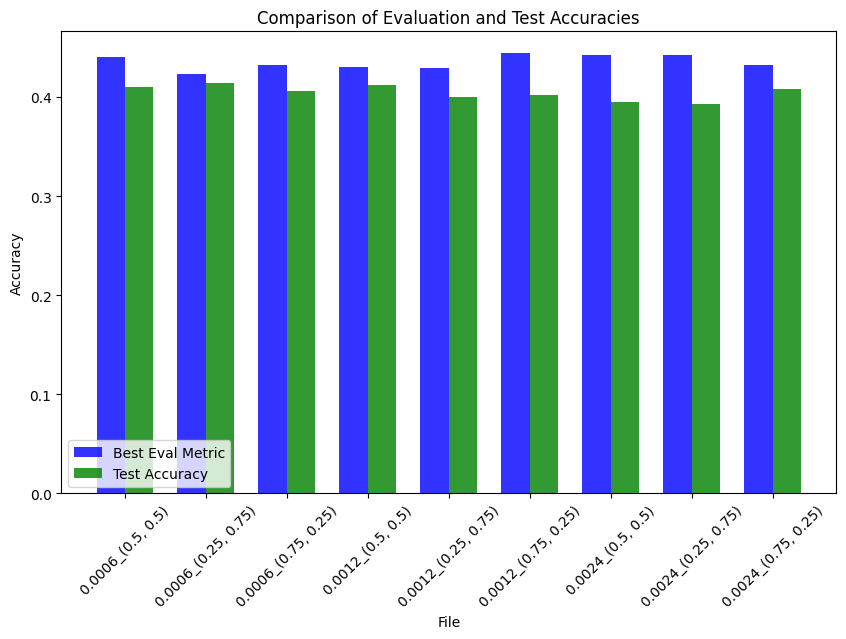

In [54]:
eval_accuracies = []
test_accuracies = []
best_eval_accuracies = []

# Loop through each file, read the data, and extract the metrics
for path in file_names_v2:
    with open(path, 'r') as file:
        data = json.load(file)
        # Assuming the last entry in log_history contains the final eval/test metrics
        # Check for None and set a default value if necessary
        eval_accuracy = 0  # Default value if not found
        test_accuracy = 0  # Default value if not found
        best_eval_accuracy = 0  # Default value if not found
        for entry in data['log_history']:
            if 'test_label_accuracy' in entry:
                test_accuracy = entry['test_label_accuracy']
            elif 'test_exact_match_accuracy' in entry:
                test_accuracy = entry['test_exact_match_accuracy']
                
            if 'eval_label_accuracy' in entry and entry["eval_label_accuracy"] > best_eval_accuracy:
                # eval_accuracy = entry['eval_label_accuracy']
                best_eval_accuracy = entry['eval_label_accuracy']
                
        eval_accuracies.append(eval_accuracy)
        test_accuracies.append(test_accuracy)
        best_eval_accuracies.append(best_eval_accuracy)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(file_names_v2))
bar_width = 0.35
opacity = 0.8

# rects1 = ax.bar(index, eval_accuracies, bar_width, alpha=opacity, color='b', label='Eval Accuracy')
rects2 = ax.bar(index, best_eval_accuracies, bar_width, alpha=opacity, color='b', label='Best Eval Metric')
rects3 = ax.bar([p + bar_width for p in index], test_accuracies, bar_width, alpha=opacity, color='g', label='Test Accuracy')

ax.set_xlabel('File')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Evaluation and Test Accuracies')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(names)
ax.tick_params(axis='x', labelrotation=45)

ax.legend(loc='lower left')

# plt.tight_layout()

plt.show()

In [63]:
# ghet max of best eval accuracy
print(max(best_eval_accuracies))
print(best_eval_accuracies.index(max(best_eval_accuracies)))
print(max(test_accuracies))
print(test_accuracies.index(max(test_accuracies)))

print(file_names_v2[best_eval_accuracies.index(max(best_eval_accuracies))])
print(file_names_v2[test_accuracies.index(max(test_accuracies))])



data = pd.DataFrame({'File': names, 'Best Eval Metric': best_eval_accuracies, 'Test Accuracy': test_accuracies})
print(data)


0.444
5
0.414
1
/Users/tompieper/v2logs/t5-small-logs/0.0012_(0.75, 0.25)/metrics.json
/Users/tompieper/v2logs/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json
                  File  Best Eval Metric  Test Accuracy
0    0.0006_(0.5, 0.5)             0.440          0.410
1  0.0006_(0.25, 0.75)             0.423          0.414
2  0.0006_(0.75, 0.25)             0.432          0.406
3    0.0012_(0.5, 0.5)             0.430          0.412
4  0.0012_(0.25, 0.75)             0.429          0.400
5  0.0012_(0.75, 0.25)             0.444          0.402
6    0.0024_(0.5, 0.5)             0.442          0.395
7  0.0024_(0.25, 0.75)             0.442          0.393
8  0.0024_(0.75, 0.25)             0.432          0.408
